In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
im = imageio.imread(".//imagenes//s3//3.pgm")
im = im.astype(np.uint8)

print(im)


[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


/tmp/ipykernel_2026489/2312877241.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(".//imagenes//s3//3.pgm")


In [3]:
print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 204
Min original 10


In [4]:
im_original = im

im = im / 255

print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 0.8
Min original 0.0392156862745098


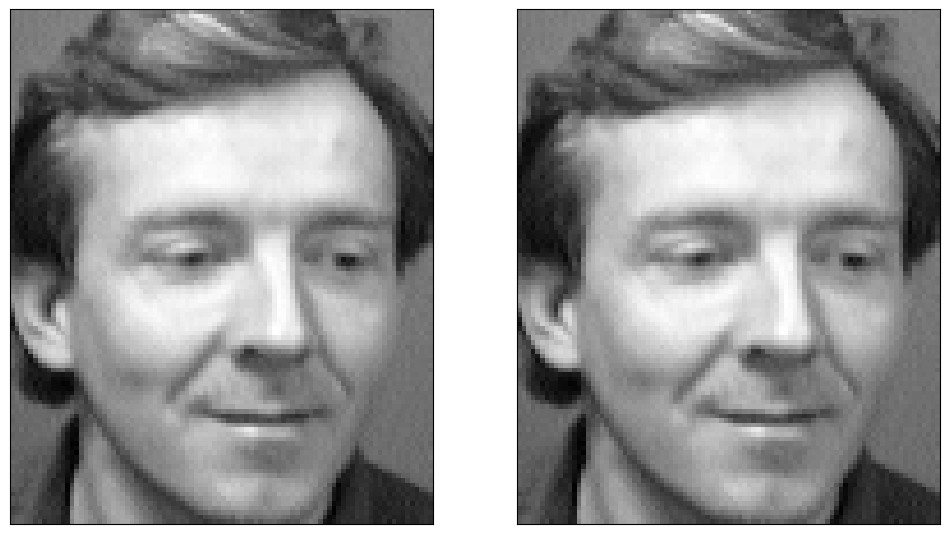

In [5]:
fix, ax = plt.subplots(1, 2, figsize=(12,12),
                       subplot_kw = {'xticks' : [], 'yticks':[]})

ax[0].imshow(im_original, cmap = "gray")
ax[1].imshow(im, cmap = "gray")


/tmp/ipykernel_2026489/1133440294.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(path)


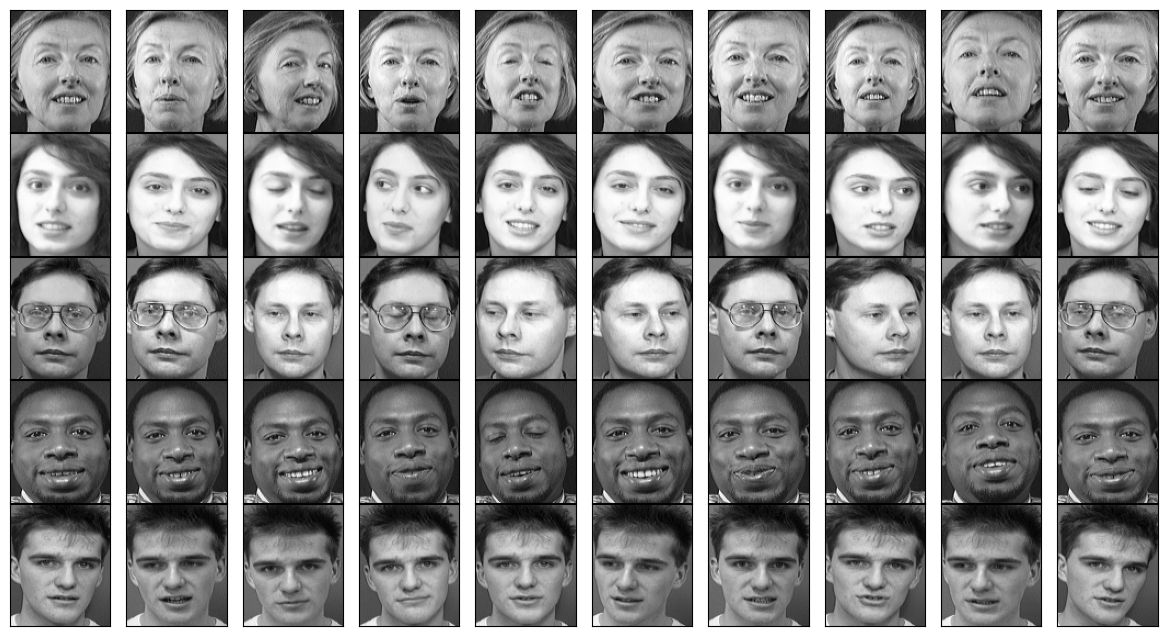

In [11]:
from glob import iglob

caras_list = []


for path in iglob('.//imagenes//*/*.pgm'):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name=path)
    caras_list.append(cara)


caras = pd.concat(caras_list, axis=1).T


fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112, 92), cmap="gray")

plt.show()

In [12]:
from sklearn.decomposition import PCA

In [13]:
caras_pca = PCA(n_components = 0.999)

caras_pca.fit(caras)

PCA(n_components=0.999)

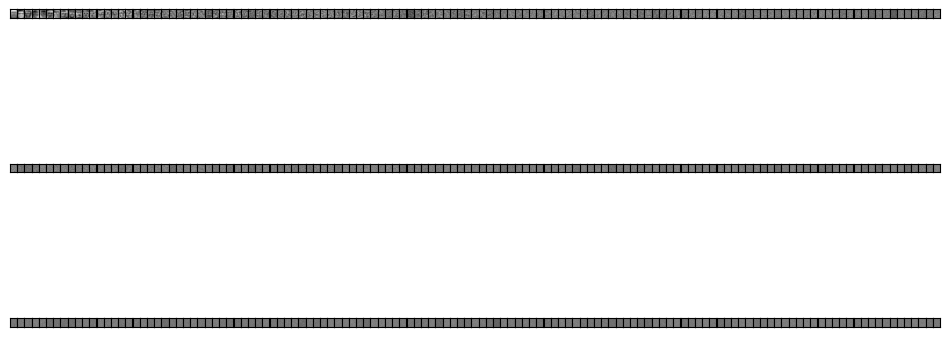

In [14]:
filas = 3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas, columnas, figsize=(12, 6),
                       subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap = "gray")

In [15]:
print(caras_pca.n_components_)

388


In [16]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

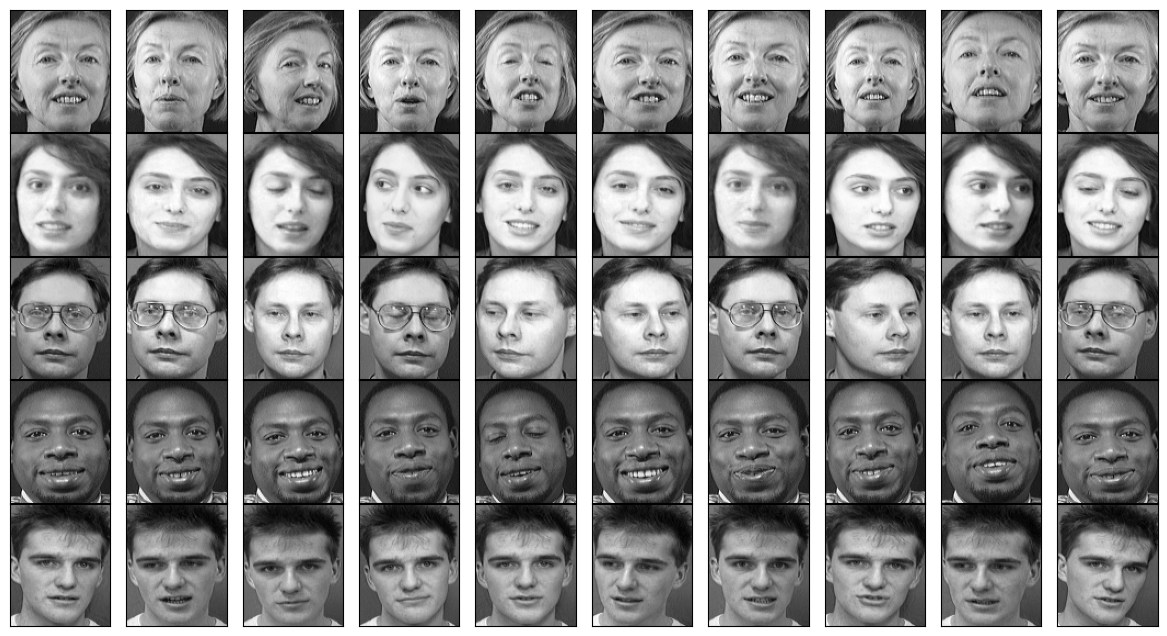

In [17]:
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                       subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap = "gray")